##OBJECTIVE
The main objective of this project is to Predict Brain Stroke at early stages to save life with the help of Machine learning techniques.

###About Dataset

According to World Health Organization(WHO) STROKE is the 2nd leading cause of death globally,
responsible for approximately 11% of total deaths.This dataset is used to predict whether
a patient is likely to get stroke based on the input parameters like gender,age,various
 diseases, and smoking status.Each row in the data provides elavant information about
  the patient.




##IMPORTING LIBRARIES AND LOADING DATA

In [676]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [677]:
df = pd.read_csv('/content/Brain_stroke_dataset.csv')  #Dataset which we picked from Kaggle

##DATA EXPLORATION

In [678]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [679]:
df.shape

(5110, 12)

In [680]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


##Numerical columns info

In [681]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [682]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

##DATA CLEANING


##Checking Null Values

In [683]:
df.isnull().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

In [684]:
print('Missing Data sum:')
print(df.isnull().sum())

Missing Data sum:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [685]:
print('\n Missing Data percentage(%):')
print(df.isnull().sum()/df.count()*100)




 Missing Data percentage(%):
id                   0.00000
gender               0.00000
age                  0.00000
hypertension         0.00000
heart_disease        0.00000
ever_married         0.00000
work_type            0.00000
Residence_type       0.00000
avg_glucose_level    0.00000
bmi                  4.09452
smoking_status       0.00000
stroke               0.00000
dtype: float64


##Removing Null Values

In [686]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors = 5)
df['bmi'] = imputer.fit_transform(df[['bmi']])

df.isnull().sum()


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

##Checking Duplicate Values

In [687]:
df.duplicated().sum()

0

##Data Analysis

##Show number of Patients by Stroke

In [688]:
df.stroke.value_counts()


0    4861
1     249
Name: stroke, dtype: int64

In [689]:
df.stroke.value_counts().rename('count')
df.stroke.value_counts(True).rename('%').mul(100)

0    95.127202
1     4.872798
Name: %, dtype: float64

Text(0.5, 1.0, 'Number of Patient')

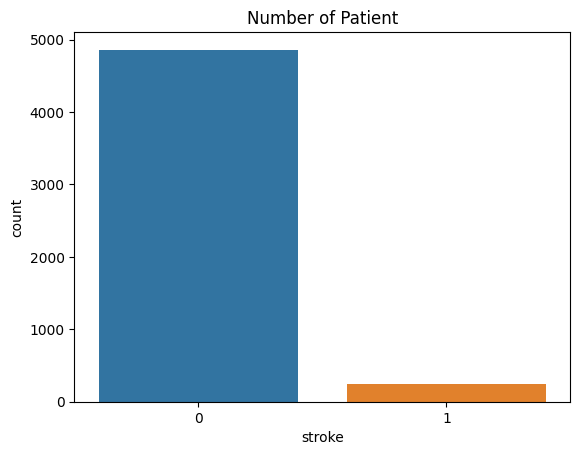

In [690]:
sns.countplot(data=df,x='stroke')
plt.title('Number of Patient')

In [691]:
df['gender'].value_counts()


Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

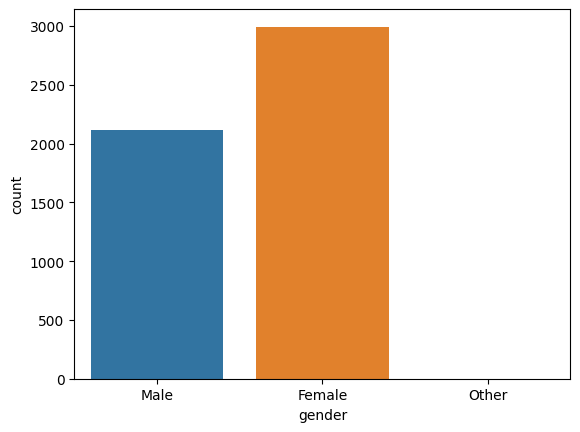

In [692]:
sns.countplot(data=df,x='gender')

In [693]:
df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

<Axes: xlabel='work_type', ylabel='count'>

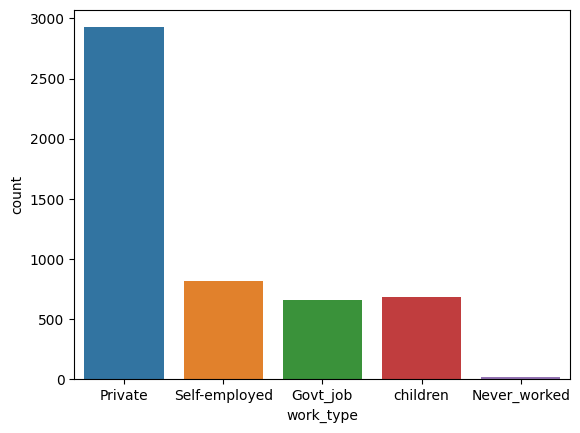

In [694]:
sns.countplot(data=df,x='work_type')

In [695]:
df['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

<Axes: xlabel='Residence_type', ylabel='count'>

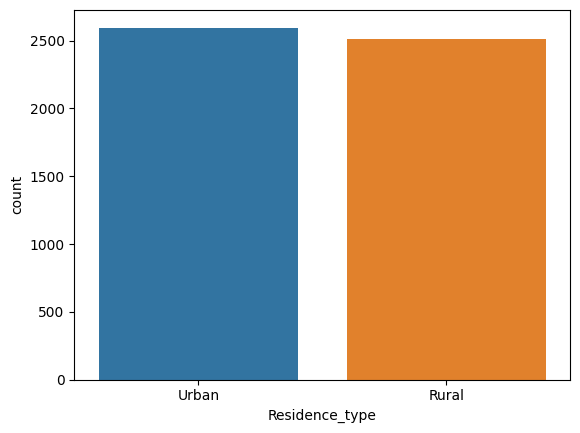

In [696]:
sns.countplot(data=df,x='Residence_type')

In [697]:
df['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

<Axes: xlabel='ever_married', ylabel='count'>

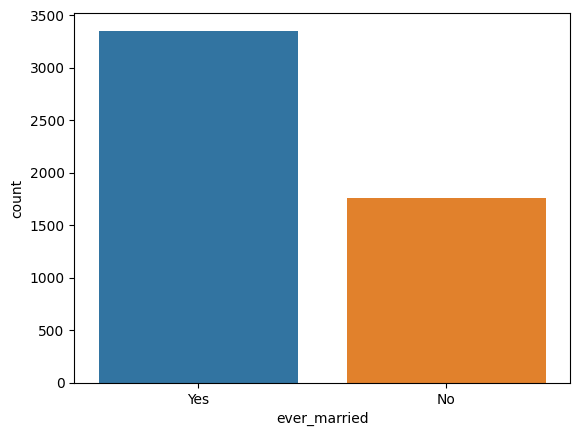

In [698]:
sns.countplot(data=df, x='ever_married')

In [699]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

<Axes: xlabel='smoking_status', ylabel='count'>

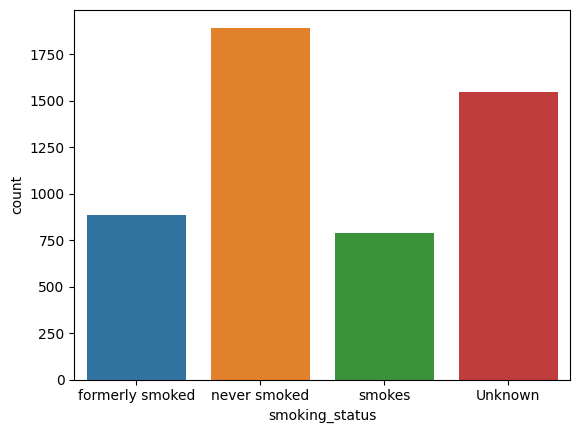

In [700]:
sns.countplot(data=df,x='smoking_status')

##Dealing with Smoking_status column

In [701]:
temp = df[(df['smoking_status']=="Unknown")].index
df.drop(df.index[temp],inplace=True )

In [702]:
df['smoking_status'].value_counts()

never smoked       1892
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

<Axes: xlabel='smoking_status', ylabel='count'>

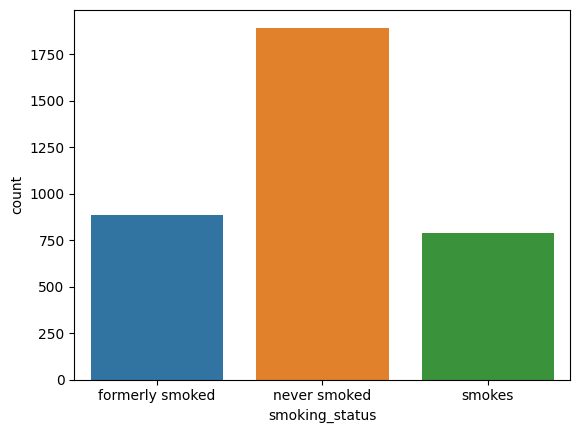

In [703]:
sns.countplot(data=df,x='smoking_status')

In [704]:
print(df.smoking_status.value_counts())
df.info()

never smoked       1892
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3566 entries, 0 to 5108
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3566 non-null   int64  
 1   gender             3566 non-null   object 
 2   age                3566 non-null   float64
 3   hypertension       3566 non-null   int64  
 4   heart_disease      3566 non-null   int64  
 5   ever_married       3566 non-null   object 
 6   work_type          3566 non-null   object 
 7   Residence_type     3566 non-null   object 
 8   avg_glucose_level  3566 non-null   float64
 9   bmi                3566 non-null   float64
 10  smoking_status     3566 non-null   object 
 11  stroke             3566 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 362.2+ KB



##Separte Categorical and Numerical Features

In [705]:
print(df['gender'].unique())
print(df['work_type'].unique())
print(df['Residence_type'].unique())
print(df['smoking_status'].unique())
print(df['ever_married'].unique())

['Male' 'Female' 'Other']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes']
['Yes' 'No']


In [706]:
cat_features=[feature for feature in df.columns if df[feature].dtypes=='O']
print("Number of Categorical variables:",len(cat_features))
print('*'*80)
print('Categorical variables column name:', cat_features)

Number of Categorical variables: 5
********************************************************************************
Categorical variables column name: ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [707]:
cd=pd.DataFrame(cat_features)
cd.head()

,0
0,gender
1,ever_married
2,work_type
3,Residence_type
4,smoking_status


In [708]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='O']
print("Number of Numerical variables:",len(numerical_features))
print('*'*80)
print('Numerical variables column name:', numerical_features)

Number of Numerical variables: 7
********************************************************************************
Numerical variables column name: ['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']


In [709]:
cd=pd.DataFrame(numerical_features)
cd.head()


,0
0,id
1,age
2,hypertension
3,heart_disease
4,avg_glucose_level


##VIZUALIZATION

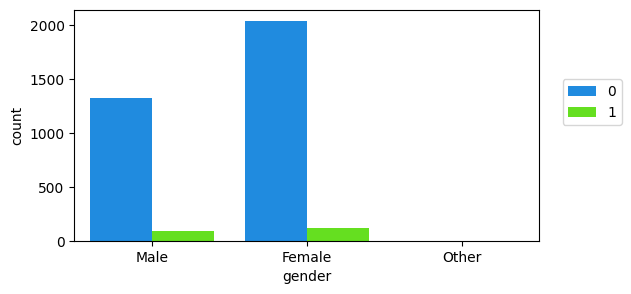

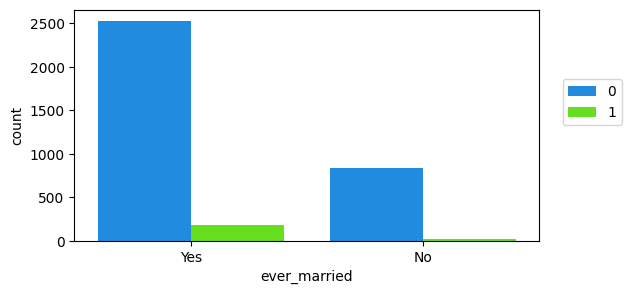

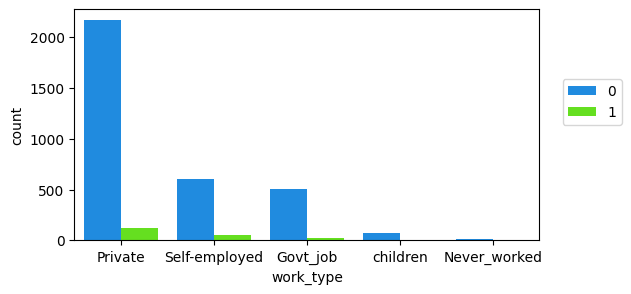

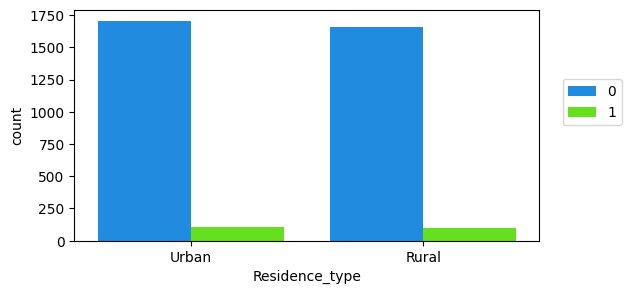

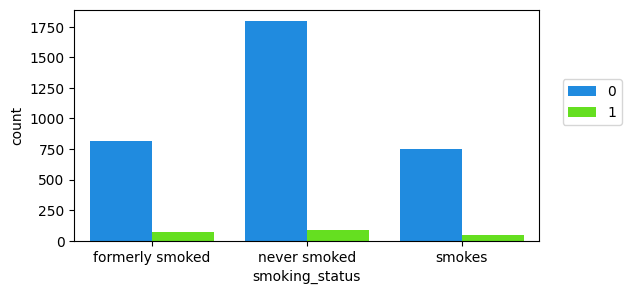

In [710]:
for col in cat_features[:]:
    plt.figure(figsize=(6,3),dpi=100)
    sns.countplot(data=df,x=col,hue='stroke',palette='gist_rainbow_r')
    plt.legend(loc=(1.05,0.5))


##Barplot of Numerical Features

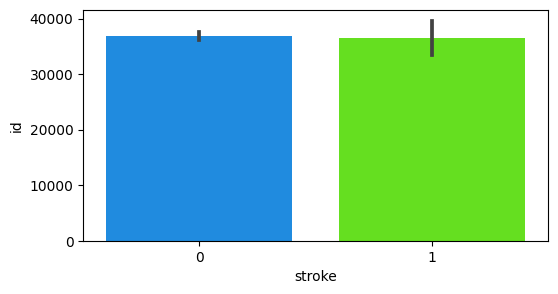

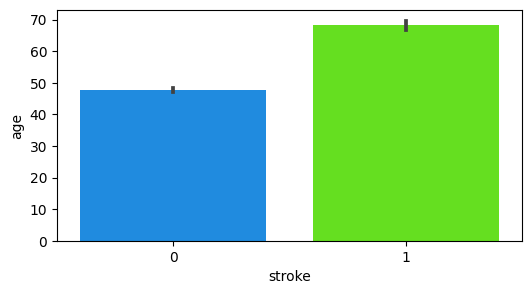

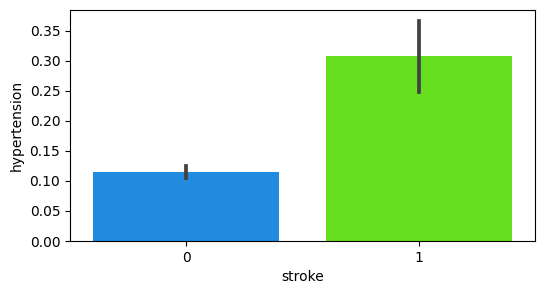

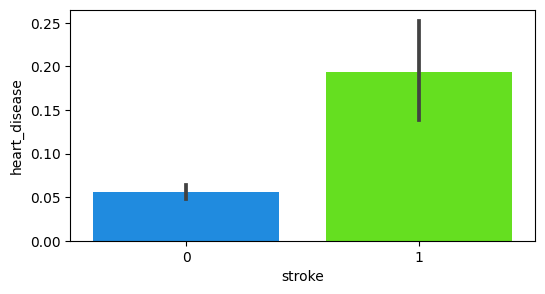

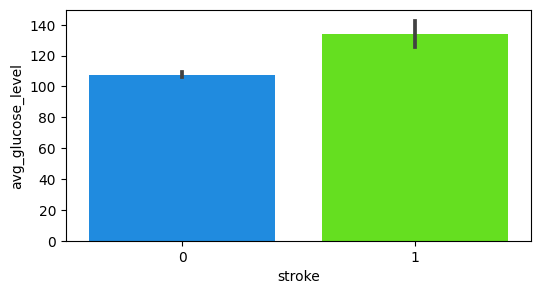

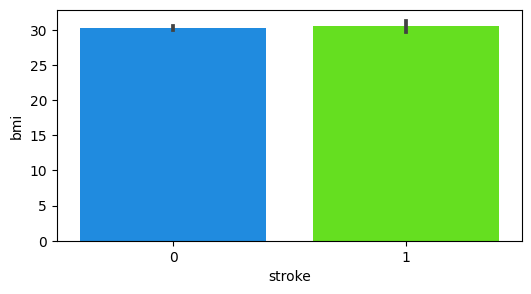

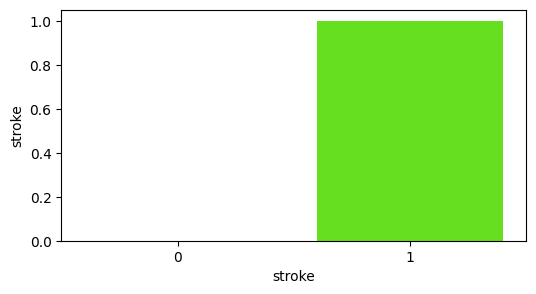

In [711]:
for col in numerical_features:
    plt.figure(figsize=(6, 3), dpi=100)
    sns.barplot(data=df, x='stroke', y=col, palette='gist_rainbow_r')

##VIZUALIZATION w.r.t Stroke

In [712]:
get_ipython().system('pip install cufflinks')
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)  #  link pandas to plotly and add the iplot method


##The Proportion of Stroke among Gender

In [713]:

gender = df.groupby(df['gender'])['stroke'].sum()
df_gender = pd.DataFrame({'labels': gender.index,'values': gender.values})
colors = ['lightpink', 'lightskyblue']
df_gender.iplot(kind='pie',labels='labels',values='values', title='The Proportion of Stroke among Gender', colors = colors,pull=[0.1, 0.1, 0.1, 0.2])


##Work type of people who had stroke

In [714]:
job = df.groupby(df['work_type'])['stroke'].sum()
df_job = pd.DataFrame({'labels': job.index,'values': job.values})
colors2= ['palegreen','paleturquoise','thistle','moccasin']
df_job.iplot(kind='pie',labels='labels',values='values', title='Work type of people who had stroke', colors = colors2,  pull=[0.1, 0.1, 0.1, 0.2])

##Smoking status of people who had stroke

In [715]:
smoke = df.groupby(df['smoking_status'])['stroke'].sum()
df_smoke = pd.DataFrame({'labels': smoke.index,'values': smoke.values})
df_smoke.iplot(kind='pie',labels='labels',values='values', title='Smoking status of people who had stroke', colors = colors2, pull=[0.02, 0.02, 0.1, 0.02])

##Residence area of people who had stroke

In [716]:


Residence = df.groupby(df['Residence_type'])['stroke'].sum()
df_Residence = pd.DataFrame({'labels': Residence.index, 'values': Residence.values})
df_Residence.iplot(kind='pie',labels='labels',values='values', title='Residence area of people who had stroke', colors = colors2, pull=[0.02, 0.02],hole = 0.3)



##Marriage status of people who had stroke

In [717]:


Married = df.groupby(df['ever_married'])['stroke'].sum()
df_Married = pd.DataFrame({'labels': Married.index,'values': Married.values})
df_Married.iplot(kind='pie',labels='labels',values='values', title='Marriage status of people who had stroke', colors = colors2, pull=[0.02, 0.02],hole = 0.3)


##Stroke age among gender

In [718]:


stroke = df.loc[df['stroke']== 1].reset_index()

stroke["male_age"]=stroke[stroke["gender"]=="Male"]["age"]
stroke["female_age"]=stroke[stroke["gender"]=="Female"]["age"]
stroke[["male_age","female_age"]].iplot(kind="histogram", bins=20, theme="white", title="Stroke Ages", xTitle='Ages', yTitle='Count')



##Corelation Matrix

[Text(0.5, 1.0, 'Corelation Matrix')]

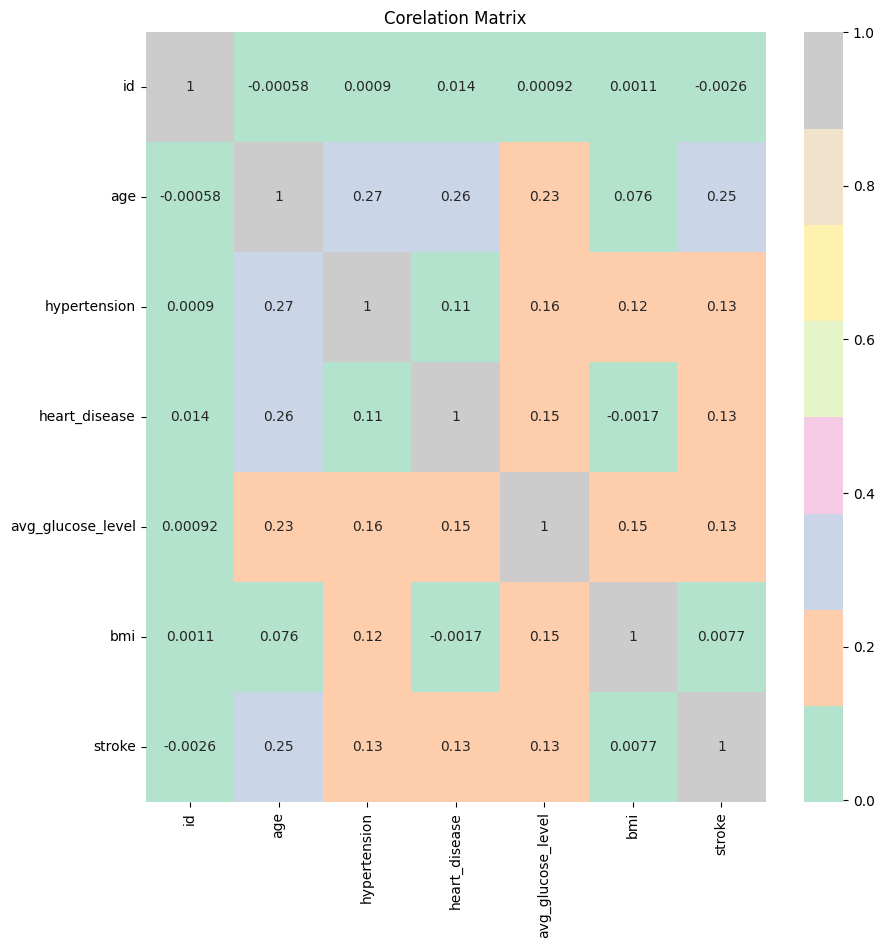

In [719]:
corr=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(data=corr,annot=True,cmap='Pastel2').set(title='Corelation Matrix')

In [720]:
corr_matrix=df.corr().round(2)
corr_matrix

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.00,-0.00,0.00,0.01,0.00,0.00,-0.00
age,-0.00,1.00,0.27,0.26,0.23,0.08,0.25
hypertension,0.00,0.27,1.00,0.11,0.16,0.12,0.13
heart_disease,0.01,0.26,0.11,1.00,0.15,-0.00,0.13
avg_glucose_level,0.00,0.23,0.16,0.15,1.00,0.15,0.13
bmi,0.00,0.08,0.12,-0.00,0.15,1.00,0.01
stroke,-0.00,0.25,0.13,0.13,0.13,0.01,1.00


##Dropping irrelevant feature "id"

In [721]:
train = df.drop('id', axis=1)
train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5102,Female,57.0,0,0,Yes,Private,Rural,77.93,21.700000,never smoked,0
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0


In [722]:
train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [723]:
train.shape

(3566, 11)

In [724]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3566 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3566 non-null   object 
 1   age                3566 non-null   float64
 2   hypertension       3566 non-null   int64  
 3   heart_disease      3566 non-null   int64  
 4   ever_married       3566 non-null   object 
 5   work_type          3566 non-null   object 
 6   Residence_type     3566 non-null   object 
 7   avg_glucose_level  3566 non-null   float64
 8   bmi                3566 non-null   float64
 9   smoking_status     3566 non-null   object 
 10  stroke             3566 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 334.3+ KB


In [725]:
train_data_cat=train.select_dtypes("object")
train_data_num=train.select_dtypes("number")

In [726]:
train_data_cat.head(3)

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked


In [727]:
train_data_num.head(3)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.600000,1
1,61.0,0,0,202.21,28.893237,1
2,80.0,0,1,105.92,32.500000,1


##Converting categorical features into numerical

## Encoding of categorical data

In [728]:
#from sklearn.preprocessing import LabelEncoder
#encode = LabelEncoder()
#train_data_cat.loc[:,['gender','ever_married','work_type','Residence_type','smoking_status']]=\
#train_data_cat.loc[:,['gender','ever_married','work_type','Residence_type','smoking_status']].apply(encode.fit_transform)
#train_data_cat.head()

In [729]:
train_data_cat_encoded=pd.get_dummies(train_data_cat,columns=train_data_cat.columns.to_list())
train_data_cat_encoded.head()

,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0
1,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0
2,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
3,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1
4,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0


In [730]:
corr_matrix=train_data_cat.corr().round(2)
corr_matrix

""


In [731]:
#Concatenating encoded categorical data with numerical data
data = pd.concat([train_data_cat_encoded, train_data_num], axis=1, join='outer')
data.head()

,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,...,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,0,1,0,0,1,0,0,1,0,0,...,1,1,0,0,67.0,0,1,228.69,36.600000,1
1,1,0,0,0,1,0,0,0,1,0,...,0,0,1,0,61.0,0,0,202.21,28.893237,1
2,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,80.0,0,1,105.92,32.500000,1
3,1,0,0,0,1,0,0,1,0,0,...,1,0,0,1,49.0,0,0,171.23,34.400000,1
4,1,0,0,0,1,0,0,0,1,0,...,0,0,1,0,79.0,1,0,174.12,24.000000,1


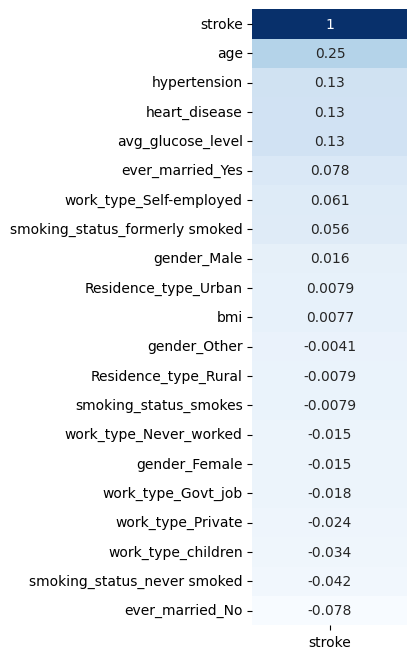

In [732]:


corr = data.corr()['stroke'].sort_values(ascending=False).to_frame()
plt.figure(figsize=(2,8))
sns.heatmap(corr, cmap='Blues', cbar=False, annot=True)
plt.show()



##Separate dependent and independent feature

In [733]:
y = data['stroke']
x = data.drop('stroke', axis=1)


In [734]:
print(x.shape)
print(y.shape)

(3566, 20)
(3566,)


## Balance the dataset (SMOTE)

In [735]:
from imblearn.over_sampling import SMOTE

In [736]:
smote = SMOTE(sampling_strategy= 'minority')
x_sm , y_sm = smote.fit_resample(x,y)
y_sm.value_counts()

1    3364
0    3364
Name: stroke, dtype: int64

In [737]:
x_sm.shape

(6728, 20)

In [738]:
y_sm.shape

(6728,)

## Spliting Dataset into training and testing Dataset

Taking dataset after applying SMOTE

In [739]:
from sklearn.model_selection import train_test_split , cross_validate
x_train, x_test , y_train , y_test= train_test_split(x_sm,y_sm)   #test_size = 0.25
x_train.shape, x_test.shape

((5046, 20), (1682, 20))

In [740]:
y_test.value_counts()

0    870
1    812
Name: stroke, dtype: int64

## Appling Models

### Model1 KNeighbor Classifier

In [741]:
from sklearn.neighbors import KNeighborsClassifier
Model1 = KNeighborsClassifier()
Model1.fit(x_train,y_train)

KNeighborsClassifier()

Predicting Result and calculate the accuracy

In [742]:
y1_predict = Model1.predict(x_test)
y1_comp = pd.DataFrame({'y_test':y_test ,'y-predict':y1_predict})

In [743]:
from collections import Counter
count_y1_predict= Counter(y1_predict)
count_y_test = Counter(y_test)
print("Original result:", count_y_test)
print("Predicted Result by Model1:",count_y1_predict)

Original result: Counter({0: 870, 1: 812})
Predicted Result by Model1: Counter({1: 1011, 0: 671})


In [744]:
from sklearn.metrics import accuracy_score
print("Accuracy Score of Model1: ",accuracy_score(y1_predict,y_test))
pd.crosstab(y_test,y1_predict)


Accuracy Score of Model1:  0.861474435196195


col_0,0,1
stroke,,
0,654,216
1,17,795


<Axes: >

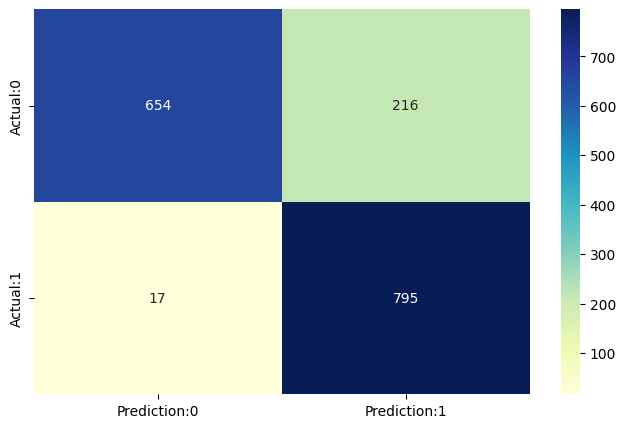

In [745]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y1_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Prediction:0','Prediction:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='YlGnBu')

In [746]:
test=pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y1_predict
})

In [747]:
test.head(20)

,Actual,Y test predicted
542,0,0
5747,1,1
1851,0,0
4674,1,1
3170,0,0
4515,1,1
5219,1,1
556,0,0
4163,1,1
4125,1,1


### Model2 LogisticRegression

In [748]:
from sklearn.linear_model import LogisticRegression
Model2 = LogisticRegression(random_state=0)
Model2.fit(x_train,y_train)

LogisticRegression(random_state=0)

Predicting Result and calculate the accuracy

In [749]:
y2_predict = Model2.predict(x_test)
#y2_comp = pd.DataFrame({'y_test':y_test ,'y2-predict':y2_predict})
print("Accuracy Score of Model2: ",accuracy_score(y2_predict,y_test))
pd.crosstab(y_test,y2_predict)

Accuracy Score of Model2:  0.9375743162901308


col_0,0,1
stroke,,
0,844,26
1,79,733


<Axes: >

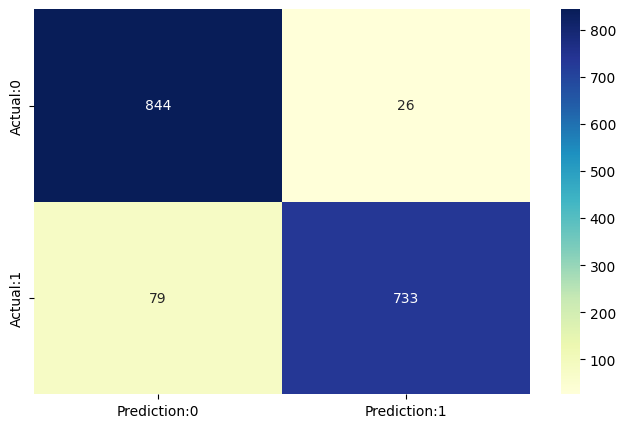

In [750]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y2_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Prediction:0','Prediction:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='YlGnBu')

In [751]:
test=pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y2_predict
})

In [752]:
test.head(20)

,Actual,Y test predicted
542,0,0
5747,1,1
1851,0,0
4674,1,1
3170,0,0
4515,1,1
5219,1,1
556,0,0
4163,1,1
4125,1,1


### Model3 Decision Tree Classification Entropy

In [753]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier , DecisionTreeRegressor
from sklearn.tree import export_graphviz
from graphviz import Source


# DecisionTreeClassifier
Model3 = tree.DecisionTreeClassifier(criterion='entropy',max_depth=12)
Model3.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=12)

Predicting Result and calculate the accuracy

In [754]:
from sklearn.metrics import accuracy_score ,confusion_matrix
y3_predict = Model3.predict(x_test)
print("Accuracy Score of Model3: ",accuracy_score(y3_predict,y_test))
print(confusion_matrix(y_test,y3_predict))
pd.crosstab(y_test,y3_predict)

Accuracy Score of Model3:  0.9334126040428062
[[815  55]
 [ 57 755]]


col_0,0,1
stroke,,
0,815,55
1,57,755


<Axes: >

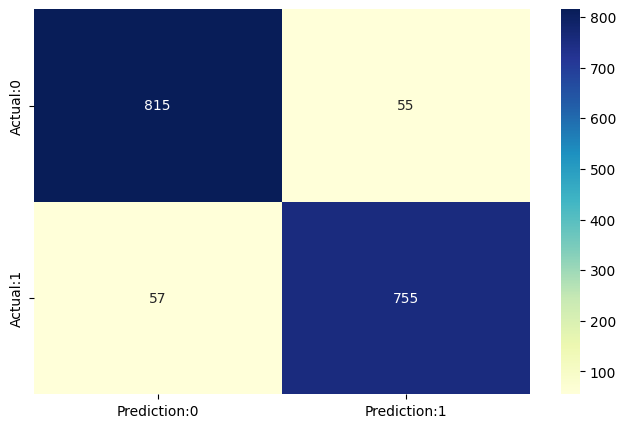

In [755]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y3_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Prediction:0','Prediction:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='YlGnBu')

In [756]:
test=pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y3_predict
})

In [757]:
test.head(20)

,Actual,Y test predicted
542,0,0
5747,1,1
1851,0,0
4674,1,1
3170,0,0
4515,1,1
5219,1,1
556,0,0
4163,1,1
4125,1,1


### Model4 Decision Tree Classification GINI Index

In [758]:
# DecisionTreeClassifier
Model4 = tree.DecisionTreeClassifier(criterion='gini',random_state=0,max_depth=12)
Model4.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=12, random_state=0)

In [759]:
y4_predict = Model4.predict(x_test)
print("Accuracy Score of Model3: ",accuracy_score(y4_predict,y_test))
print(confusion_matrix(y_test,y4_predict))
pd.crosstab(y_test,y4_predict)

Accuracy Score of Model3:  0.9363852556480381
[[809  61]
 [ 46 766]]


col_0,0,1
stroke,,
0,809,61
1,46,766


<Axes: >

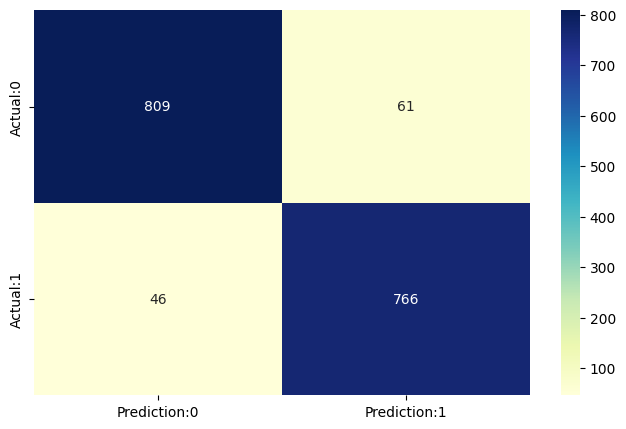

In [760]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y4_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Prediction:0','Prediction:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='YlGnBu')

In [761]:
test=pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y4_predict
})


In [762]:
test.head(20)

,Actual,Y test predicted
542,0,0
5747,1,1
1851,0,0
4674,1,1
3170,0,0
4515,1,1
5219,1,1
556,0,0
4163,1,1
4125,1,1


### Model5: Decision Tree Regression

In [763]:
from sklearn.ensemble import RandomForestClassifier
Model5 = RandomForestClassifier(random_state=0,max_depth=12)
Model5.fit(x_train, y_train)

RandomForestClassifier(max_depth=12, random_state=0)

In [764]:
y5_predict = Model5.predict(x_test)
print("Accuracy Score of Model3: ",accuracy_score(y_test,y5_predict))
print(confusion_matrix(y_test,y5_predict))
pd.crosstab(y_test,y5_predict)

Accuracy Score of Model3:  0.9673008323424495
[[864   6]
 [ 49 763]]


col_0,0,1
stroke,,
0,864,6
1,49,763


<Axes: >

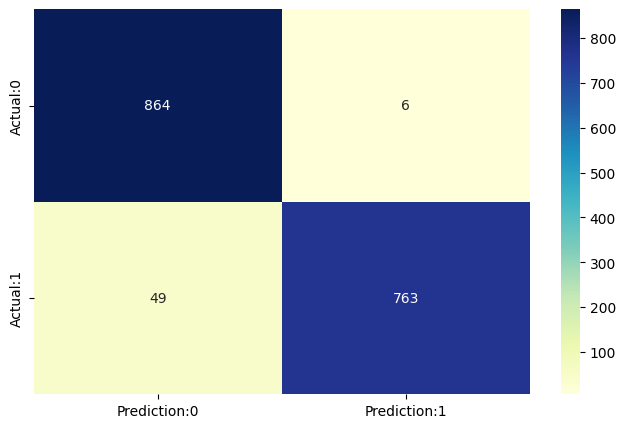

In [765]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y5_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Prediction:0','Prediction:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='YlGnBu')

In [766]:
test=pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y5_predict
})

In [767]:
test.head(20)

,Actual,Y test predicted
542,0,0
5747,1,1
1851,0,0
4674,1,1
3170,0,0
4515,1,1
5219,1,1
556,0,0
4163,1,1
4125,1,1


## Comparison of Accuracy Score of model

In [768]:
print("Accuracy Score of Model1 \"KNeighbour\" : ",accuracy_score(y_test,y1_predict)*100)
print("Accuracy Score of Model2 \"LogisticRegression\" :",accuracy_score(y_test,y2_predict)*100)
print("Accuracy Score of Model3 \"Decision tree classification (Entropy)\" :",accuracy_score(y_test,y3_predict)*100)
print("Accuracy Score of Model4 \"Decision tree classification (GINI)\" :",accuracy_score(y_test,y4_predict)*100)
print("Accuracy Score of Model5 \"Random Forest\" :",accuracy_score(y_test,y5_predict)*100)

Accuracy Score of Model1 "KNeighbour" :  86.1474435196195
Accuracy Score of Model2 "LogisticRegression" : 93.75743162901308
Accuracy Score of Model3 "Decision tree classification (Entropy)" : 93.34126040428062
Accuracy Score of Model4 "Decision tree classification (GINI)" : 93.63852556480381
Accuracy Score of Model5 "Random Forest" : 96.73008323424494
